In [11]:
import os
import vtk
from pycaster import pycaster as pycaster

---

We're gonna use this function to embed a still image of a VTK render

In [12]:
import vtk
from IPython.display import Image
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = writer.GetResult()
    
    return Image(data)

This function adds a line to a `vtkRenderer`

In [13]:
def addLine(renderer, p1, p2, color=[0.0, 0.0, 1.0]):
    line = vtk.vtkLineSource()
    line.SetPoint1(p1)
    line.SetPoint2(p2)

    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputConnection(line.GetOutputPort())

    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(color)

    renderer.AddActor(actor)

This function adds a point (a sphere really) to a `vtkRenderer`

In [14]:
def addPoint(renderer, p, radius=1.0, color=[0.0, 0.0, 0.0]):
    point = vtk.vtkSphereSource()
    point.SetCenter(p)
    point.SetRadius(radius)
    point.SetPhiResolution(100)
    point.SetThetaResolution(100)

    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputConnection(point.GetOutputPort())

    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(color)

    renderer.AddActor(actor)

---

Create a new `rayCaster` object through the `fromSTL` static-method thus loading the STL file `bones.stl` and creating a new `rayCaster` under `caster`

In [15]:
caster = pycaster.rayCaster.fromSTL("bones.stl", scale=1)

Create a new `vtkRenderer` and visualize the `caster.mesh` using `vtk_show`

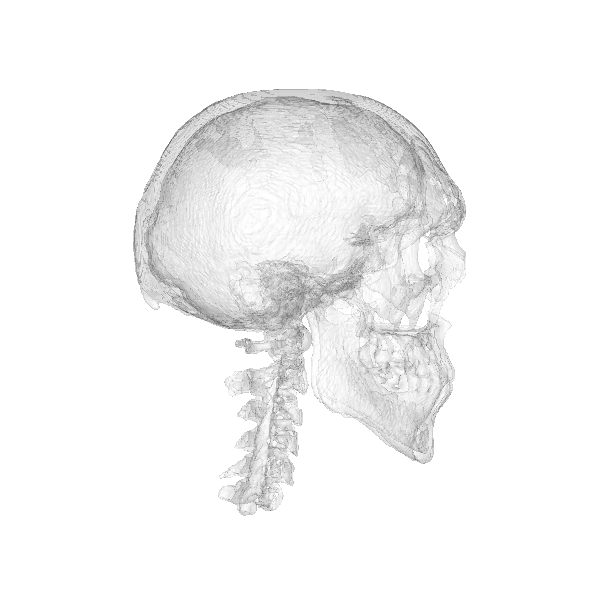

In [16]:
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(caster.mesh)

actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.GetProperty().SetOpacity(0.15)

renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(1.0, 1.0, 1.0)
vtk_show(renderer, 600, 600)

Set the source and target coordinate of the ray

In [17]:
pSource = [100.0, 100.0, 0.0]
pTarget = [0.0, 0.0, 0.0]

Use the `addPoint` and `addLine` helper-functions to render the ray as well as the source (red) and target (green) points

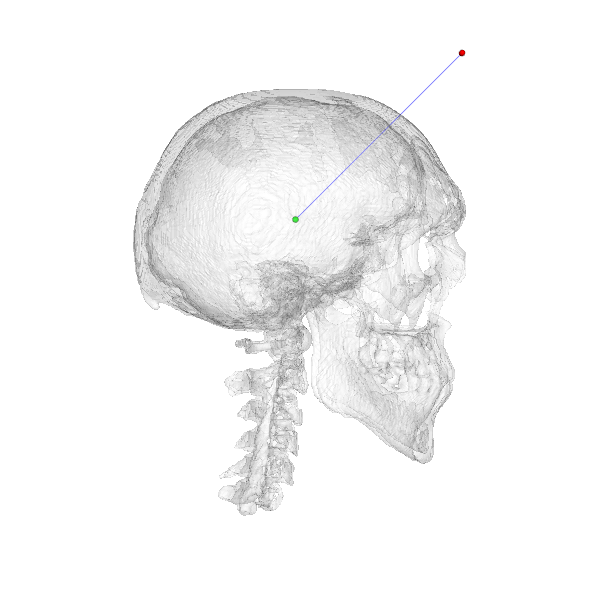

In [18]:
addPoint(renderer, pSource, radius=2.0, color=[1.0, 0.0, 0.0])
addPoint(renderer, pTarget, radius=2.0, color=[0.0, 1.0, 0.0])
addLine(renderer, pSource, pTarget)
vtk_show(renderer, 600, 600)

Use the `castRay` method of the `rayCaster` class to intersect a ray/line with the surface and return a `list` of coordinates, i.e., the intersection points

In [19]:
pointsIntersection = caster.castRay(pSource, pTarget)
pointsIntersection

[(62.11714172363281, 62.11714172363281, 0.0),
 (56.11714553833008, 56.11714553833008, 0.0)]

Use the `calcDistanceInSolid` to calculate the distance the ray 'travels' within the surface

In [20]:
caster.calcDistanceInSolid(pSource, pTarget)

8.48527597944196

Loop through `pointsIntersection` list and use the `addPoint` helper-function to render the intersection points (blue)

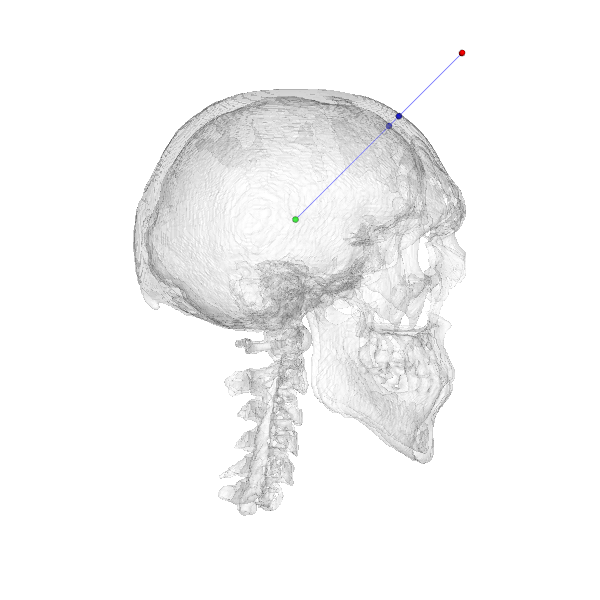

In [21]:
for p in pointsIntersection:
    addPoint(renderer, p, radius = 2.0, color=[0.0, 0.0, 1.0])
vtk_show(renderer, 600, 600)